In [1]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

In [2]:
x, sr = librosa.load('audio/simple_loop.wav')

In [3]:
ipd.Audio(x, rate=sr)

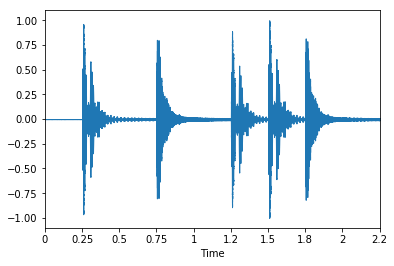

In [4]:
librosa.display.waveplot(x, sr=sr)

In [5]:
hop_length = 256
frame_length = 1024

In [6]:
energy = numpy.array([
    sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)
])

In [7]:
energy.shape

(194,)

In [8]:
rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length)[0]

In [9]:
rmse.shape

(194,)

In [10]:
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

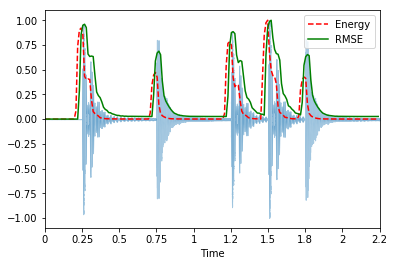

In [11]:
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, energy/energy.max(), 'r--')             # normalized for visualization
plt.plot(t[:len(rmse)], rmse/rmse.max(), color='g') # normalized for visualization
plt.legend(('Energy', 'RMSE'))